2024-12-20 12:08:59,952 - nomad - INFO - LMOKEParser called on M:\00_Hysteresen\2024_0206\2024_0206_1_LMOKE_2024-08-26_17-55-53.txt
2024-12-20 12:08:59,975 - nomad - INFO - Extracted metadata from M:\00_Hysteresen\2024_0206\2024_0206_1_LMOKE_2024-08-26_17-55-53.txt
c:\Users\exp4-ArVe-220\nomad-age\.pyenv\Lib\site-packages\nomad\metainfo\metainfo.py:1540: SyntaxWarning: LMOKEandVMOKESchema(user, sample, sample_state, device, datetime, uuid, meas_type, profile, sample_angle, field_angle, +24 more properties) is not derived from its definition nomad.datamodel.datamodel.EntryArchive.data:SubSection.
  warnings.warn(
2024-12-20 12:08:59,996 - nomad - INFO - Stored metadata in EntryArchive(data)
2024-12-20 12:08:59,997 - nomad - INFO - LMOKENormalizer called
2024-12-20 12:08:59,997 - nomad - INFO - Normalizing magnetization data
C:\Users\exp4-ArVe-220\nomad-age\src\nomad_age\normalizers\LMOKEnormalizer.py:69: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarr

m_def nomad_age.schema_packages.LMOKEandVMOKESchema.LMOKEandVMOKESchema
user Arne Vereijken
sample 2024_0206_1
sample_state after FC
device LMOKE
datetime 2024-08-26_17-55-53
uuid None
meas_type Hysteresis
profile PT_15x15AfterFC.txt
sample_angle 0.0
field_angle 0.0
temperature 300.0
calibration None
polarization s
H_start -30.0
H_end 20.0
pts_per_branch 100
time_per_point 0.01
delay_time 0.01
nCycles 1
cycle 1
comment 

H_stop 0.0
wait_time 1.0
nSched 100
nMinorLoops 5
nX 8
nY 10
DeltaX 8.0
DeltaY 10.0
X 0
Y 0
avg_raster False
magnetic_field [19.507700466593427, 19.091821650193953, 18.444319408704967, 17.991714715894915, 17.55163020822482, 17.109041663526746, 16.476772313958065, 16.01665551006402, 15.571145588833275, 15.120418923794217, 14.680334416124133, 14.000071023518876, 13.523260639438204, 13.063143835544164, 12.623267997626408, 11.970549012329098, 11.508136841159397, 11.057618845872666, 10.58059979203966, 9.93873163386366, 9.4861269410536, 9.042495047593858, 8.585716959737141, 

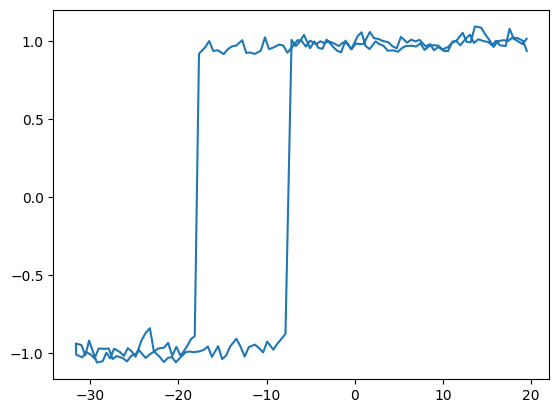

In [1]:
from nomad.datamodel import EntryArchive
from nomad.parsing.file_parser import FileParser, TextParser, Quantity
from nomad_age.parsers.LMOKEparser import LMOKEParser
from nomad_age.normalizers.LMOKEnormalizer import LMOKENormalizer
import logging

# Configure the logger
test_logger = logging.getLogger('nomad')
test_logger.setLevel(logging.INFO)

# Create a console handler and set the level to info
console_handler = logging.StreamHandler()
console_handler.setLevel(logging.INFO)

# Create a formatter and set it for the handler
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
console_handler.setFormatter(formatter)

# Add the handler to the logger
test_logger.addHandler(console_handler)

file = r"M:\00_Hysteresen\2023_0325\2023_0325_1_LMOKE_2023-11-07_14-09-15.txt"
file = r"M:\00_Hysteresen\2024_0235\2024_0235_1_RASTER_2024-09-05_16-10-59\Raster_0001_0003.txt"
file = r"M:\00_Hysteresen\2024_0206\2024_0206_1_LMOKE_2024-08-26_17-55-53.txt"
# file = r"M:\00_Hysteresen\2023_0325\2023_0325_1_bFC_V-MOKE_2024-10-31_17-01-30_0_0.txt"
# file = r"Z:\02_people\Vereijken_Arne\00_PhD\07_PythonScripts\PythonPackagesOptional.txt"

p = LMOKEParser()
a = EntryArchive()
p.parse(file, a, logger=test_logger)

# print(a.m_to_dict())

from nomad_age.schema_packages.LMOKEandVMOKESchema import LMOKEandVMOKESchema

# Print the quantities defined in the schema
# print('Missing quantities:')
# for quantity in LMOKEandVMOKESchema.m_def.all_quantities:
#     if quantity not in a.m_to_dict()['data']:
#         if quantity not in ['max_voltage_correction', 'training_effect_elimination']: #only for VMOKE and thus not yet of interest
#             print(quantity)

# import re

# pattern = r'#\sComment\s+(.*?)(?=\n#\sMeas\.\stype|\n#\s-{4,})'
# with open(file, 'r') as f:
#     content = f.read()
#     match = re.search(pattern, content, re.DOTALL)
#     if match:
#         print(match.group(1))
#     else:
#         print('No match')


norm = LMOKENormalizer()
norm.normalize(a, logger=test_logger)

# print(a.m_to_dict())
for key, value in a.m_to_dict().items():
    for key2, value2 in value.items():
        print(key2, value2)


import matplotlib.pyplot as plt
plt.plot(a.m_to_dict()['data']['magnetic_field'], a.m_to_dict()['data']['magnetization'])



In [2]:
a.m_to_dict()['data']['HEB']

-12.810616523055845